# Predicting the compressive strength of concrete cube specimen using Machine Learning

In this notebook, we're going to go through a machine learning project with the objective of predicting the compressive strength of concrete cube specimen.

## 1. Problem Definiton

> How well can we predict the compressive strength of concrete cube specimen, given the characteristics of previous concrete cube specimen?

## 2. Data

This data is downloaded from Kaggle. 
Reference: https://www.kaggle.com/datasets/elikplim/concrete-compressive-strength-data-set

### 2.1 Data Type
The data is multivariate.

### 2.2 Abstract
Concrete is one of the most important materials in civil engineering. Compressive strength of concrete cube specimen is dependent on its ingredients used such as cement, coarse aggregate, fine aggregate, water, blast furnace slag, fly ash, superplasticizer.

### 2.3 Data Characteristics
The actual concrete compressive strength (MPa) for a given mixture under a specific age (days) was determined from laboratory. Data is in raw form (not scaled).

### 2.4 Summary of the data
* Number of instances (observations): 1030
* Number of Attributes: 9
* Attribute breakdown: 8 quantitative input variables, and 1 quantitative output variable
* Missing Attribute Values: None

## 3. Evaluation

The evaluation metrics used will be **Mean Squared Error** and **R^2 Score**.

## 4. Features

The attributes given below are the features of the data.

**Name -- Data Type -- Measurement -- Description**

* Cement (component 1) -- quantitative -- kg in a m3 mixture -- Input Variable
* Blast Furnace Slag (component 2) -- quantitative -- kg in a m3 mixture -- Input Variable
* Fly Ash (component 3) -- quantitative -- kg in a m3 mixture -- Input Variable
* Water (component 4) -- quantitative -- kg in a m3 mixture -- Input Variable
* Superplasticizer (component 5) -- quantitative -- kg in a m3 mixture -- Input Variable
* Coarse Aggregate (component 6) -- quantitative -- kg in a m3 mixture -- Input Variable
* Fine Aggregate (component 7) -- quantitative -- kg in a m3 mixture -- Input Variable
* Age -- quantitative -- Day (1~365) -- Input Variable

**Concrete compressive strength -- quantitative -- MPa -- Output Variable**

In [1]:
# Import the necessary Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Import the necessary Python libraries
from sklearn import preprocessing

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor

from sklearn.svm import SVR

from sklearn import metrics

from sklearn.ensemble import VotingRegressor

import xgboost

from xgboost import XGBRegressor

from scipy import stats

from scipy.stats import zscore

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import KFold, cross_val_score

from sklearn.neural_network import MLPRegressor

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read in a CSV file containing data on concrete strength
# The data contains 9 features, including cement, slag, ash, water, superplasticizer, 
# coarse aggregate, fine aggregate, age, and strength.
# This DataFrame will be used to build and evaluate machine learning models 
# to predict concrete strength based on the input features
df = pd.read_csv("concrete_data.csv")

In [4]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
df.tail()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


In [7]:
df.head().T

,0,1,2,3,4
cement,540.00,540.00,332.50,332.50,198.6
blast_furnace_slag,0.00,0.00,142.50,142.50,132.4
fly_ash,0.00,0.00,0.00,0.00,0.0
water,162.00,162.00,228.00,228.00,192.0
superplasticizer,2.50,2.50,0.00,0.00,0.0
coarse_aggregate,1040.00,1055.00,932.00,932.00,978.4
fine_aggregate,676.00,676.00,594.00,594.00,825.5
age,28.00,28.00,270.00,365.00,360.0
concrete_compressive_strength,79.99,61.89,40.27,41.05,44.3


In [8]:
df.tail().T

,1025,1026,1027,1028,1029
cement,276.40,322.20,148.5,159.10,260.9
blast_furnace_slag,116.00,0.00,139.4,186.70,100.5
fly_ash,90.30,115.60,108.6,0.00,78.3
water,179.60,196.00,192.7,175.60,200.6
superplasticizer,8.90,10.40,6.1,11.30,8.6
coarse_aggregate,870.10,817.90,892.4,989.60,864.5
fine_aggregate,768.30,813.40,780.0,788.90,761.5
age,28.00,28.00,28.0,28.00,28.0
concrete_compressive_strength,44.28,31.18,23.7,32.77,32.4


In [9]:
# Display a summary of the DataFrame, including the number of rows, 
# columns, and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cement                         1030 non-null   float64
 1   blast_furnace_slag             1030 non-null   float64
 2   fly_ash                        1030 non-null   float64
 3   water                          1030 non-null   float64
 4   superplasticizer               1030 non-null   float64
 5   coarse_aggregate               1030 non-null   float64
 6   fine_aggregate                 1030 non-null   float64
 7   age                            1030 non-null   int64  
 8   concrete_compressive_strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [10]:
df.dtypes

cement                           float64
blast_furnace_slag               float64
fly_ash                          float64
water                            float64
superplasticizer                 float64
coarse_aggregate                 float64
fine_aggregate                   float64
age                                int64
concrete_compressive_strength    float64
dtype: object

In [11]:
df.shape

(1030, 9)

In [12]:
print(df.shape[0]) # It indicates the number of rows
print(df.shape[1]) # It indicates the number of columns

1030
9


####  It shows that there are eight independent variables and one dependent variable. There are 1030 rows in the dataset.

In [13]:
# Check for missing values in each column of the DataFrame and 
# display the total number of missing values for each column
df.isna().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

####  It shows that there are no null values.

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
blast_furnace_slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
fly_ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarse_aggregate,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fine_aggregate,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
concrete_compressive_strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


## Exploratory Data Analysis (EDA)

## Cement

#### The first and third quartiles (Q1 and Q3) represent the 25th and 75th percentiles, respectively, and IQR is the difference between Q3 and Q1

In [15]:
# Calculate the quartiles and interquartile range (IQR) for the "cement" column of the DataFrame 
# using the scipy.stats module
cement_Q1 = df["cement"].quantile(q=0.25)
cement_Q3 = df["cement"].quantile(q=0.75)
print("1st Quartile (Q1) is: ", cement_Q1)
print("3rd Quartile (Q1) is: ", cement_Q3)
print("Interquartile range (IQR) is: ", stats.iqr(df["cement"]))

1st Quartile (Q1) is:  192.375
3rd Quartile (Q1) is:  350.0
Interquartile range (IQR) is:  157.625


In [16]:
Cement_Lower_Outliers = cement_Q1 - 1.5 * (cement_Q3 - cement_Q1)
Cement_Upper_Outliers = cement_Q3 + 1.5 * (cement_Q3 - cement_Q1)
print("Lower outliers in cement: ", Cement_Lower_Outliers)
print("Upper outliers in cement: ", Cement_Upper_Outliers)

Lower outliers in cement:  -44.0625
Upper outliers in cement:  586.4375


In [17]:
print("Number of lower outliers in cement: ", df[df["cement"] < -44.0625]["cement"].count())
print("Number of upper outliers in cement: ", df[df["cement"] > 586.4375]["cement"].count())

Number of lower outliers in cement:  0
Number of upper outliers in cement:  0


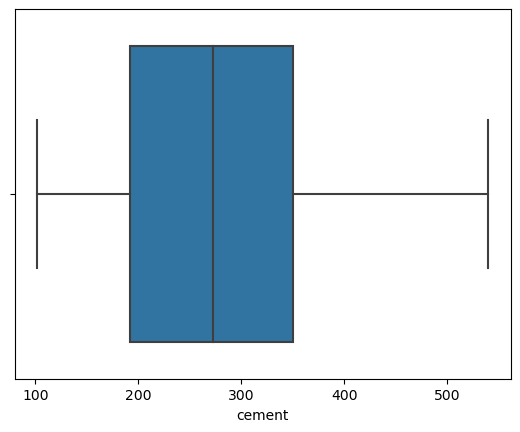

In [18]:
sns.boxplot(x="cement", data=df, orient='h');

## Water

In [19]:
# Calculate the quartiles and interquartile range (IQR) for the "water" column of the DataFrame 
# using the scipy.stats module
water_Q1 = df["water"].quantile(q=0.25)
water_Q3 = df["water"].quantile(q=0.75)
print("1st Quartile (Q1) is: ", water_Q1)
print("3rd Quartile (Q1) is: ", water_Q3)
print("Interquartile range (IQR) is: ", stats.iqr(df["water"]))

1st Quartile (Q1) is:  164.9
3rd Quartile (Q1) is:  192.0
Interquartile range (IQR) is:  27.099999999999994


In [20]:
Water_Lower_Outliers = water_Q1 - 1.5 * (water_Q3 - water_Q1)
Water_Upper_Outliers = water_Q3 + 1.5 * (water_Q3 - water_Q1)
print("Lower outliers in water: ", Water_Lower_Outliers)
print("Upper outliers in water: ", Water_Upper_Outliers)

Lower outliers in water:  124.25000000000001
Upper outliers in water:  232.64999999999998


In [21]:
print("Number of lower outliers in water: ", df[df["water"] < 124.25000000000001]["water"].count())
print("Number of upper outliers in water: ", df[df["water"] > 232.64999999999998]["water"].count())

Number of lower outliers in water:  5
Number of upper outliers in water:  4


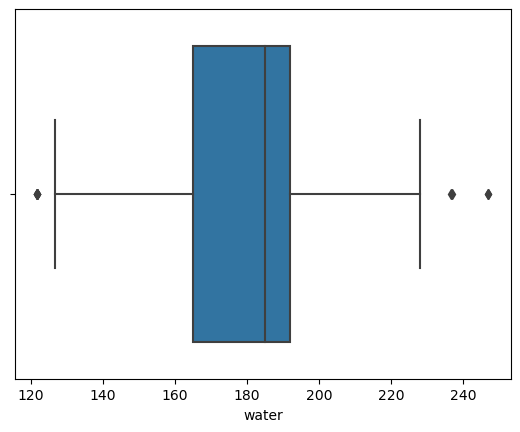

In [22]:
sns.boxplot(x="water", data=df, orient='h');

## Slag

In [23]:
# Calculate the quartiles and interquartile range (IQR) for the "slag" column of the DataFrame 
# using the scipy.stats module
bfs_Q1 = df["blast_furnace_slag"].quantile(q=0.25)
bfs_Q3 = df["blast_furnace_slag"].quantile(q=0.75)
print("1st Quartile (Q1) is: ", bfs_Q1)
print("3rd Quartile (Q1) is: ", bfs_Q3)
print("Interquartile range (IQR) is: ", stats.iqr(df["blast_furnace_slag"]))

1st Quartile (Q1) is:  0.0
3rd Quartile (Q1) is:  142.95
Interquartile range (IQR) is:  142.95


In [24]:
BFS_Lower_Outliers = bfs_Q1 - 1.5 * (bfs_Q3 - bfs_Q1)
BFS_Upper_Outliers = bfs_Q3 + 1.5 * (bfs_Q3 - bfs_Q1)
print("Lower outliers in water: ", BFS_Lower_Outliers)
print("Upper outliers in water: ", BFS_Upper_Outliers)

Lower outliers in water:  -214.42499999999998
Upper outliers in water:  357.375


In [25]:
print("Number of lower outliers in blast furnace slag: ", df[df["blast_furnace_slag"] < -214.42499999999998]["blast_furnace_slag"].count())
print("Number of upper outliers in blast furnace slag: ", df[df["blast_furnace_slag"] > 357.375]["blast_furnace_slag"].count())

Number of lower outliers in blast furnace slag:  0
Number of upper outliers in blast furnace slag:  2


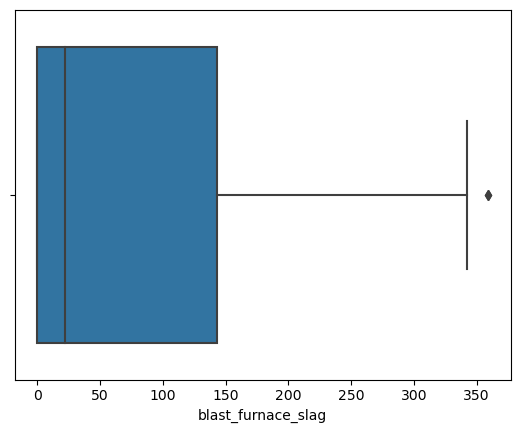

In [26]:
sns.boxplot(x="blast_furnace_slag", data=df, orient='h');

## Age

In [27]:
# Calculate the quartiles and interquartile range (IQR) for the "age" column of the DataFrame 
# using the scipy.stats module
age_Q1 = df["age"].quantile(q=0.25)
age_Q3 = df["age"].quantile(q=0.75)
print("1st Quartile (Q1) is: ", age_Q1)
print("3rd Quartile (Q1) is: ", age_Q3)
print("Interquartile range (IQR) is: ", stats.iqr(df["age"]))

1st Quartile (Q1) is:  7.0
3rd Quartile (Q1) is:  56.0
Interquartile range (IQR) is:  49.0


In [28]:
Age_Lower_Outliers = age_Q1 - 1.5 * (age_Q3 - age_Q1)
Age_Upper_Outliers = age_Q3 + 1.5 * (age_Q3 - age_Q1)
print("Lower outliers in age: ", Age_Lower_Outliers)
print("Upper outliers in age: ", Age_Upper_Outliers)

Lower outliers in age:  -66.5
Upper outliers in age:  129.5


In [29]:
print("Number of lower outliers in age: ", df[df["age"] < -66.5]["age"].count())
print("Number of upper outliers in age: ", df[df["age"] > 129.5]["age"].count())

Number of lower outliers in age:  0
Number of upper outliers in age:  59


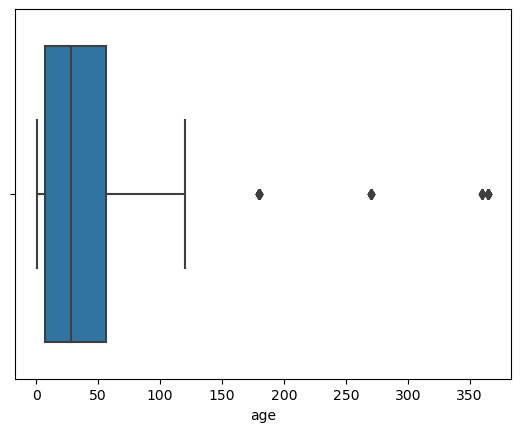

In [30]:
sns.boxplot(x="age", data=df, orient='h');

## Ash

In [31]:
# Calculate the quartiles and interquartile range (IQR) for the "ash" column of the DataFrame 
# using the scipy.stats module
fly_ash_Q1 = df["fly_ash"].quantile(q=0.25)
fly_ash_Q3 = df["fly_ash"].quantile(q=0.75)
print("1st Quartile (Q1) is: ", fly_ash_Q1)
print("3rd Quartile (Q1) is: ", fly_ash_Q3)
print("Interquartile range (IQR) is: ", stats.iqr(df["fly_ash"]))

1st Quartile (Q1) is:  0.0
3rd Quartile (Q1) is:  118.3
Interquartile range (IQR) is:  118.3


In [32]:
Fly_Ash_Lower_Outliers = fly_ash_Q1 - 1.5 * (fly_ash_Q3 - fly_ash_Q1)
Fly_Ash_Upper_Outliers = fly_ash_Q3 + 1.5 * (fly_ash_Q3 - fly_ash_Q1)
print("Lower outliers in age: ", Fly_Ash_Lower_Outliers)
print("Upper outliers in age: ", Fly_Ash_Upper_Outliers)

Lower outliers in age:  -177.45
Upper outliers in age:  295.75


In [33]:
print("Number of lower outliers in fly ash: ", df[df["fly_ash"] < -177.45]["fly_ash"].count())
print("Number of upper outliers in fly ash: ", df[df["fly_ash"] > 295.75]["fly_ash"].count())

Number of lower outliers in fly ash:  0
Number of upper outliers in fly ash:  0


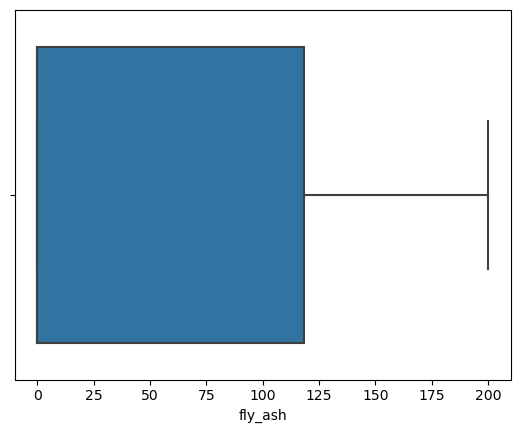

In [34]:
sns.boxplot(x="fly_ash", data=df, orient='h');

## Correlation Matrix

It is a table that **displays the correlation coefficients between pairs of variables** in a dataset. Each cell in the table represents the correlation between two variables, where **values closer to 1 or -1 indicate a stronger correlation, while values closer to 0 indicate a weaker or no correlation.** It is a useful tool for exploring the relationships between variables and identifying patterns in the data.

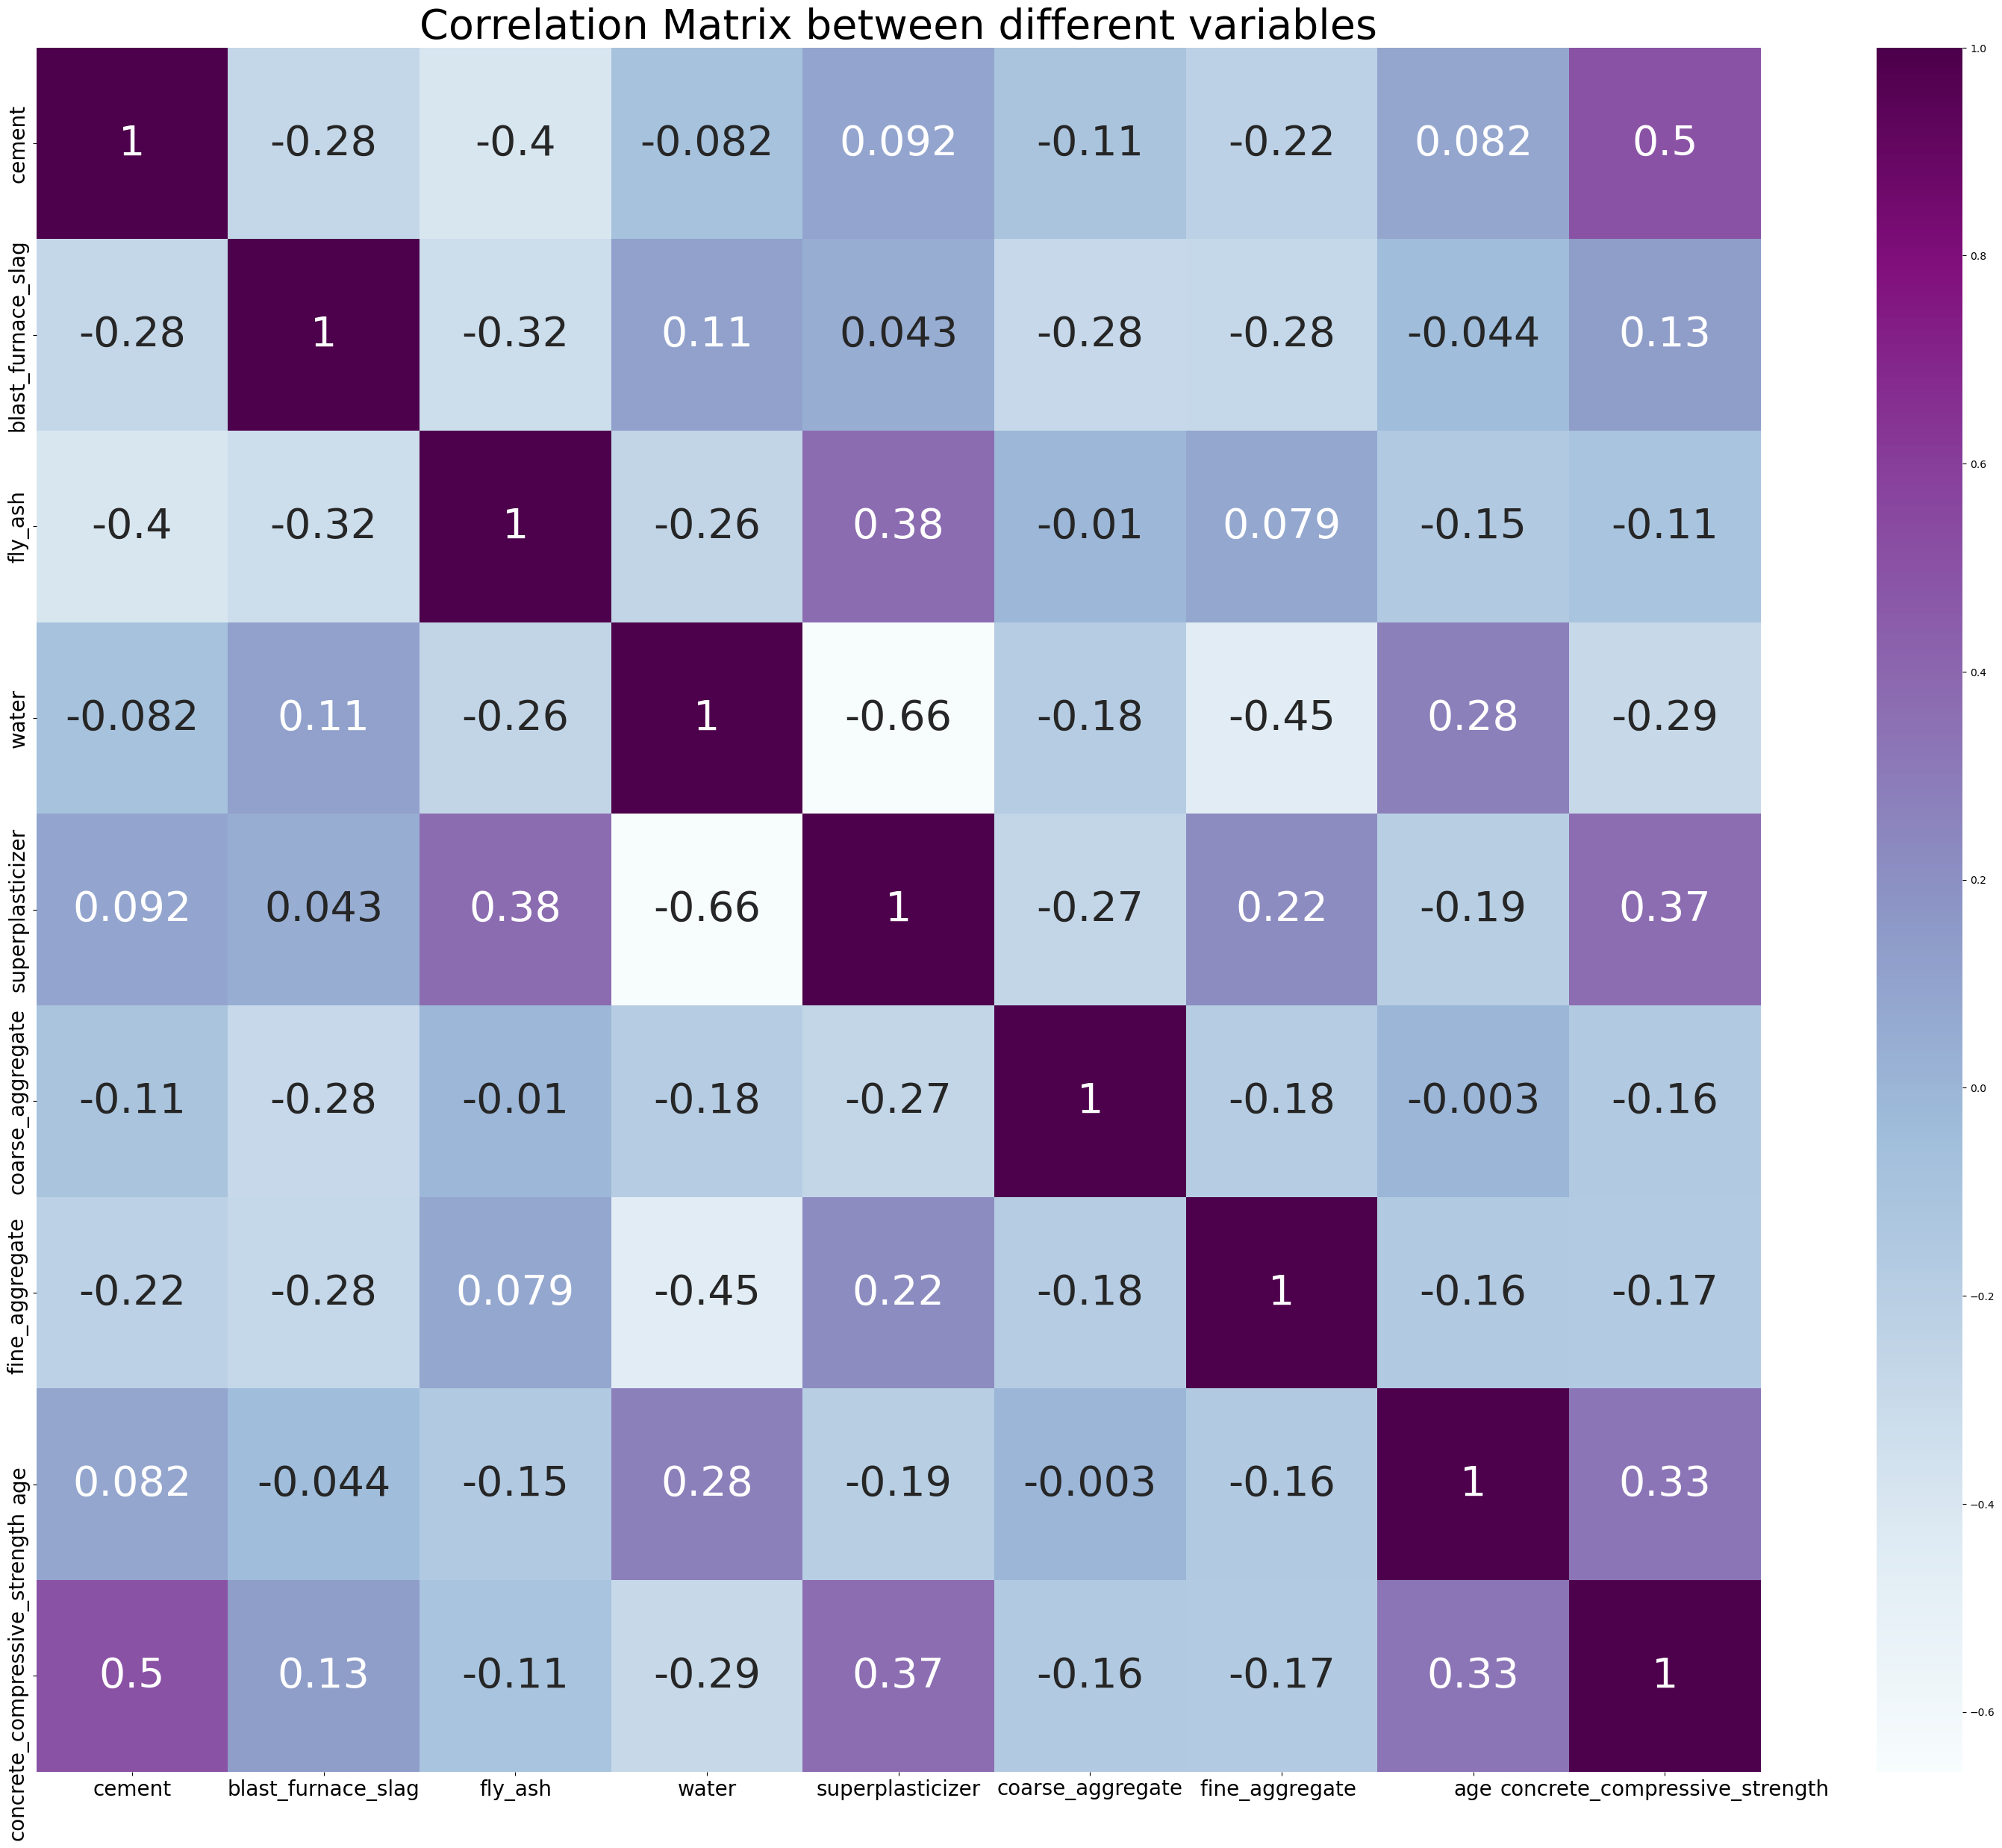

In [35]:
plt.figure(figsize=(40, 30))

heatmap = sns.heatmap(df.corr(), vmax=1, square=True, annot=True, cmap="BuPu", annot_kws={"fontsize":40})
plt.title("Correlation Matrix between different variables", fontsize=40)

# Increase font size of x and y axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), fontsize=20)
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize=20)

plt.show()

## Checking for outliers

An outlier is an **observation that differs significantly from other observations in the dataset.**

Why is checking for outliers important?
1. Outliers can skew the distribution of the data, making it difficult to determine the central tendency and variability of the data. This can affect the accuracy of statistical analyses and machine learning models.
2. They can affect the estimation of parameters in statistical models. For example, the presence of outliers in a linear regression model can lead to biased estimates of the regression coefficients and reduced predictive accuracy.
3. In some cases, outliers may represent important information or unusual phenomena that may be worth investigating further. However, in most cases, outliers are simply errors in the data that need to be removed or corrected.

In [36]:
print("Outliers in cement: ", df[((df.cement - df.cement.mean()) / df.cement.std()).abs() > 3]["cement"].count())
print("Outliers in slag: ", df[((df.blast_furnace_slag - df.blast_furnace_slag.mean()) / df.blast_furnace_slag.std()).abs() > 3]["blast_furnace_slag"].count())
print("Outliers in ash: ", df[((df.fly_ash - df.fly_ash.mean()) / df.fly_ash.std()).abs() > 3]["fly_ash"].count())
print("Outliers in water: ", df[((df.water - df.water.mean()) / df.water.std()).abs() > 3]["water"].count())
print("Outliers in superplasticizer: ", df[((df.superplasticizer - df.superplasticizer.mean()) / df.superplasticizer.std()).abs() > 3]["superplasticizer"].count())
print("Outliers in coarse aggregate: ", df[((df.coarse_aggregate - df.coarse_aggregate.mean()) / df.coarse_aggregate.std()).abs() > 3]["coarse_aggregate"].count())
print("Outliers in age: ", df[((df.age - df.age.mean()) / df.age.std()).abs() > 3]["age"].count())

Outliers in cement:  0
Outliers in slag:  4
Outliers in ash:  0
Outliers in water:  2
Outliers in superplasticizer:  10
Outliers in coarse aggregate:  0
Outliers in age:  33


## Replacing outliers by median

The median is a robust measure of central tendency that is less sensitive to extreme values as compared to the mean. By replacing outliers with the median, we can reduce the impact of extreme values on the overall distribution of the data.

Why is replacing the outliers with the median necessary?
1. The median is a more representative measure of central tendency for datasets that are skewed or have outliers. The mean can be heavily influenced by extreme values, while the median is less sensitive to outliers.
2. Replacing outliers with the median can help improve the accuracy of statistical analyses and machine learning models. Outliers can distort the distribution of the data and affect the estimation of parameters in statistical models, leading to biased results.
3. In some cases, replacing outliers with the median may be more appropriate than removing them altogether. Removing outliers can result in a loss of information and can reduce the sample size, which can affect the accuracy of machine learning models.

In [37]:
for columns in df.columns[:1]:
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    iqr = Q3 - Q1
    
    low = Q1 - 1.5 * iqr
    high = Q3 + 1.5 * iqr
    df.loc[(df[columns] < low) | (df[columns] > high), columns] = df[columns].median()

## Splitting the dataset into training and testing dataset

In [38]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [39]:
# Splitting the data into independent and dependent variables
# X contains all the columns except for "concrete_compressive_strength" which is the target 
# variable
X = df.drop("concrete_compressive_strength", axis=1)

# y contains only the "concrete_compressive_strength" column which is the target variable
y = df["concrete_compressive_strength"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

## Building different models

## 1. Linear Regressor

In [41]:
# Instantiate the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions using the model
y_preds = model.predict(X_test)

# Evaluate the model performance on the training data
train_score = model.score(X_train, y_train)
print("Training score:", train_score)

# Evaluate the model performance on the testing data
test_score = model.score(X_test, y_test)
print("Testing score:", test_score)

# Calculating the evaluation parameters
mse_lr = metrics.mean_squared_error(y_test, y_preds)

acc_lr = metrics.r2_score(y_test, y_preds)
acc_lr

# Store the accuracy results for each model in a dataframe for final comparison
results_new = pd.DataFrame({"Algorithm":["Linear Regressor"], "Accuracy":acc_lr, "Mean Squared Error":mse_lr}, index=["1"])
results = results_new[["Algorithm", "Accuracy", "Mean Squared Error"]]
y_preds_linear = model.predict(X_test)

Training score: 0.610523804764974
Testing score: 0.6275531792314852


## 2. MLP Regressor

In [42]:
# Instantiate the model
model = MLPRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions using the model
y_preds = model.predict(X_test)

# Evaluate the model performance on the training data
train_score = model.score(X_train, y_train)
print("Training score:", train_score)

# Evaluate the model performance on the testing data
test_score = model.score(X_test, y_test)
print("Testing score:", test_score)

# Calculating the evaluation parameters
mse_mlp = metrics.mean_squared_error(y_test, y_preds)
acc_mlp = metrics.r2_score(y_test, y_preds)
acc_mlp

# Store the accuracy results for each model in a dataframe for final comparison
mlp_df = pd.DataFrame({"Algorithm":["MLP Regressor"], "Accuracy":acc_mlp, "Mean Squared Error":mse_mlp}, index=["2"])
results = pd.concat([results, mlp_df])
results = results[["Algorithm", "Accuracy", "Mean Squared Error"]]
y_preds_mlp = model.predict(X_test)

Training score: 0.829381768075541
Testing score: 0.8221944871914968


## 3. MLP Regressor with Hyperparameter Tuning

In [43]:
# Define the hyperparameter grid to search over
param_grid = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

# Create the MLPRegressor model
model = MLPRegressor(random_state=42, max_iter=1000)

# Initialize the grid search cross-validation object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1)

# Fit the grid search cross-validation object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best hyperparameters to fit the model to the training data
model = MLPRegressor(random_state=42, max_iter=1000, **grid_search.best_params_)
model.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_preds = model.predict(X_test)

# Evaluate the model performance on the training data
train_score = model.score(X_train, y_train)
print("Training score:", train_score)

# Evaluate the model performance on the testing data
test_score = model.score(X_test, y_test)
print("Testing score:", test_score)

# Calculate additional performance metrics
mse_mlp = metrics.mean_squared_error(y_test, y_preds)
acc_mlp = metrics.r2_score(y_test, y_preds)

# Store the accuracy results for each model in a dataframe for final comparison
mlp_ht_df = pd.DataFrame({"Algorithm":["MLP Regressor with Hyperparameter Tuning"], "Accuracy":acc_mlp, "Mean Squared Error":mse_mlp}, index=["3"])
results = pd.concat([results, mlp_ht_df])
results = results[["Algorithm", "Accuracy", "Mean Squared Error"]]
y_preds_mlp_ht = model.predict(X_test)

Best hyperparameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'lbfgs'}
Best score: 0.8535763508145475
Training score: 0.8874202009780975
Testing score: 0.860704026951843


## 4. Lasso Regressor

In [44]:
# Instantiate the model
model = Lasso()

# Train the model
model.fit(X_train, y_train)

# Make predictions using the model
y_preds = model.predict(X_test)

# Evaluate the model performance on the training data
train_score = model.score(X_train, y_train)
print("Training score:", train_score)

# Evaluate the model performance on the testing data
test_score = model.score(X_test, y_test)
print("Testing score:", test_score)

# Calculating the evaluation parameters
mse_lasso = metrics.mean_squared_error(y_test, y_preds)
acc_lasso = metrics.r2_score(y_test, y_preds)
acc_lasso

# Store the accuracy results for each model in a dataframe for final comparison
lasso_df = pd.DataFrame({"Algorithm":["Lasso Regressor"], "Accuracy":acc_lasso, "Mean Squared Error":mse_lasso}, index=["4"])
results = pd.concat([results, lasso_df])
results = results[["Algorithm", "Accuracy", "Mean Squared Error"]]
y_preds_lasso = model.predict(X_test)

Training score: 0.6103141737176545
Testing score: 0.627597998926135


## 5. Lasso Regressor with Hyperparameter Tuning

In [45]:
# Define the hyperparameter grid to search over
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [100, 500, 1000],
    'tol': [1e-3, 1e-4, 1e-5]
}

# Create the Lasso model
model = Lasso(random_state=42)

# Initialize the grid search cross-validation object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1)

# Fit the grid search cross-validation object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best hyperparameters to fit the model to the training data
model = Lasso(random_state=42, **grid_search.best_params_)
model.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_preds = model.predict(X_test)

# Evaluate the model performance on the training data
train_score = model.score(X_train, y_train)
print("Training score:", train_score)

# Evaluate the model performance on the testing data
test_score = model.score(X_test, y_test)
print("Testing score:", test_score)

# Calculating the evaluation parameters
mse_lasso = metrics.mean_squared_error(y_test, y_preds)
acc_lasso = metrics.r2_score(y_test, y_preds)
acc_lasso

# Store the accuracy results for each model in a dataframe for final comparison
lasso_df = pd.DataFrame({"Algorithm":["Lasso Regressor with Hyperparameter Tuning"], "Accuracy":acc_lasso, "Mean Squared Error":mse_lasso}, index=["5"])
results = pd.concat([results, lasso_df])
results = results[["Algorithm", "Accuracy", "Mean Squared Error"]]
y_preds_lasso_ht = model.predict(X_test)

Best hyperparameters: {'alpha': 0.001, 'max_iter': 100, 'tol': 0.001}
Best score: 0.5894225304471478
Training score: 0.6105237755742698
Testing score: 0.6275581576283831


## 6. Ridge Regressor

In [46]:
# Instantiate the model
model = Ridge()

# Train the model
model.fit(X_train, y_train)

# Make predictions using the model
y_preds = model.predict(X_test)

# Evaluate the model performance on the training data
train_score = model.score(X_train, y_train)
print("Training score:", train_score)

# Evaluate the model performance on the testing data
test_score = model.score(X_test, y_test)
print("Testing score:", test_score)

# Calculating the evaluation parameters
mse_ridge = metrics.mean_squared_error(y_test, y_preds)
acc_ridge = metrics.r2_score(y_test, y_preds)
acc_ridge

# Store the accuracy results for each model in a dataframe for final comparison
ridge_df = pd.DataFrame({"Algorithm":["Ridge Regressor"], "Accuracy":acc_ridge, "Mean Squared Error":mse_ridge}, index=["6"])
results = pd.concat([results, ridge_df])
results = results[["Algorithm", "Accuracy", "Mean Squared Error"]]
y_preds_ridge = model.predict(X_test)

Training score: 0.6105238047320662
Testing score: 0.6275533521253214


## 7. Ridge Regressor with Hyperparameter Tuning

In [47]:
# Define the hyperparameter grid to search over
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],
    'max_iter': [100, 500, 1000],
    'tol': [1e-3, 1e-4, 1e-5]
}

# Create the Ridge model
model = Ridge(random_state=42)

# Initialize the grid search cross-validation object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1)

# Fit the grid search cross-validation object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best hyperparameters to fit the model to the training data
model = Ridge(random_state=42, **grid_search.best_params_)
model.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_preds = model.predict(X_test)

# Evaluate the model performance on the training data
train_score = model.score(X_train, y_train)
print("Training score:", train_score)

# Evaluate the model performance on the testing data
test_score = model.score(X_test, y_test)
print("Testing score:", test_score)

# Calculate additional performance metrics
ridge_mse = metrics.mean_squared_error(y_test, y_preds)
acc_ridge = metrics.r2_score(y_test, y_preds)

# Store the accuracy results for each model in a dataframe for final comparison
ridge_ht_df = pd.DataFrame({"Algorithm":["Ridge Regressor with Hyperparameter Tuning"], "Accuracy":acc_ridge, "Mean Squared Error":mse_ridge}, index=["7"])
results = pd.concat([results, ridge_ht_df])
results = results[["Algorithm", "Accuracy", "Mean Squared Error"]]
y_preds_ridge_ht = model.predict(X_test)

Best hyperparameters: {'alpha': 10, 'max_iter': 100, 'tol': 0.001}
Best score: 0.5894203695292066
Training score: 0.6105238014801042
Testing score: 0.627554903142693


## 8. XGBoost Regressor

In [48]:
# Instantiate the model
model = XGBRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions using the model
y_preds = model.predict(X_test)

# Evaluate the model performance on the training data
train_score = model.score(X_train, y_train)
print("Training score:", train_score)

# Evaluate the model performance on the testing data
test_score = model.score(X_test, y_test)
print("Testing score:", test_score)

# Calculating the evaluation parameters
mse_xgb = metrics.mean_squared_error(y_test, y_preds)
acc_xgb = metrics.r2_score(y_test, y_preds)
acc_xgb

# Store the accuracy results for each model in a dataframe for final comparison
xgb_df = pd.DataFrame({"Algorithm":["XGBoost Regressor"], "Accuracy":acc_xgb, "Mean Squared Error":mse_xgb}, index=["8"])
results = pd.concat([results, xgb_df])
results = results[["Algorithm", "Accuracy", "Mean Squared Error"]]
y_preds_xgb = model.predict(X_test)

Training score: 0.9958540045016977
Testing score: 0.9022975786775306


## 9. XGBoost Regressor with Hyperparameter Tuning

In [49]:
# Define the hyperparameter grid to search over
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1]
}

# Create the XGBRegressor model
model = XGBRegressor(random_state=42)

# Initialize the grid search cross-validation object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1)

# Fit the grid search cross-validation object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best hyperparameters to fit the model to the training data
model = XGBRegressor(random_state=42, **grid_search.best_params_)
model.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_preds = model.predict(X_test)

# Evaluate the model performance on the training data
train_score = model.score(X_train, y_train)
print("Training score:", train_score)

# Evaluate the model performance on the testing data
test_score = model.score(X_test, y_test)
print("Testing score:", test_score)

# Calculate additional performance metrics
mse_xgb = metrics.mean_squared_error(y_test, y_preds)
acc_xgb = metrics.r2_score(y_test, y_preds)

# Store the accuracy results for each model in a dataframe for final comparison
xgb_ht_df = pd.DataFrame({"Algorithm":["XGBoost Regressor with Hyperparameter Tuning"], "Accuracy":acc_xgb, "Mean Squared Error":mse_xgb}, index=["9"])
results = pd.concat([results, xgb_ht_df])
results = results[["Algorithm", "Accuracy", "Mean Squared Error"]]
y_preds_xgb_ht = model.predict(X_test)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000, 'reg_alpha': 0, 'reg_lambda': 1}
Best score: 0.9306337038044672
Training score: 0.9900005561791102
Testing score: 0.9338174354863868


## 10. Decision Tree Regressor

In [50]:
# Instantiate the model
model = DecisionTreeRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions using the model
y_preds = model.predict(X_test)

# Evaluate the model performance on the training data
train_score = model.score(X_train, y_train)
print("Training score:", train_score)

# Evaluate the model performance on the testing data
test_score = model.score(X_test, y_test)
print("Testing score:", test_score)

# Calculating the evaluation parameters
mse_dt = metrics.mean_squared_error(y_test, y_preds)
acc_dt = metrics.r2_score(y_test, y_preds)
acc_dt

# Store the accuracy results for each model in a dataframe for final comparison
dt_df = pd.DataFrame({"Algorithm":["Decision Tree Regressor"], "Accuracy":acc_dt, "Mean Squared Error":mse_dt}, index=["10"])
results = pd.concat([results, dt_df])
results = results[["Algorithm", "Accuracy", "Mean Squared Error"]]
y_preds_dt = model.predict(X_test)

Training score: 0.9969388417779822
Testing score: 0.8240710244864871


## 11. Decision Tree Regressor with Hyperparameter Tuning

In [51]:
# Define the hyperparameter grid to search over
param_grid = {
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Create the DecisionTreeRegressor model
model = DecisionTreeRegressor(random_state=42)

# Initialize the grid search cross-validation object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1)

# Fit the grid search cross-validation object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best hyperparameters to fit the model to the training data
model = DecisionTreeRegressor(random_state=42, **grid_search.best_params_)
model.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_preds = model.predict(X_test)

# Evaluate the model performance on the training data
train_score = model.score(X_train, y_train)
print("Training score:", train_score)

# Evaluate the model performance on the testing data
test_score = model.score(X_test, y_test)
print("Testing score:", test_score)

# Calculate additional performance metrics
mse_dt = metrics.mean_squared_error(y_test, y_preds)
acc_dt = metrics.r2_score(y_test, y_preds)

# Store the accuracy results for each model in a dataframe for final comparison
dt_ht_df = pd.DataFrame({"Algorithm":["Decision Tree Regressor with Hyperparameter Tuning"], "Accuracy":acc_dt, "Mean Squared Error":mse_dt}, index=["11"])
results = pd.concat([results, dt_ht_df])
results = results[["Algorithm", "Accuracy", "Mean Squared Error"]]
y_preds_dt_ht = model.predict(X_test)

Best hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best score: 0.8267410066196575
Training score: 0.9642182395690824
Testing score: 0.8161088369521378


## 12. Random Forest Regressor

In [52]:
# Instantiate the model
model = RandomForestRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions using the model
y_preds = model.predict(X_test)

# Evaluate the model performance on the training data
train_score = model.score(X_train, y_train)
print("Training score:", train_score)

# Evaluate the model performance on the testing data
test_score = model.score(X_test, y_test)
print("Testing score:", test_score)

# Calculating the evaluation parameters
mse_rfr = metrics.mean_squared_error(y_test, y_preds)
acc_rfr = metrics.r2_score(y_test, y_preds)
acc_rfr

# Store the accuracy results for each model in a dataframe for final comparison
rfr_df = pd.DataFrame({"Algorithm":["Random Forest Regressor"], "Accuracy":acc_rfr, "Mean Squared Error":mse_rfr}, index=["12"])
results = pd.concat([results, rfr_df])
results = results[["Algorithm", "Accuracy", "Mean Squared Error"]]
y_preds_rf = model.predict(X_test)

Training score: 0.9851845310781833
Testing score: 0.8790205021110615


## 13. Random Forest Regressor with Hyperparameter Tuning

In [53]:
# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create the RandomForestRegressor model
model = RandomForestRegressor(random_state=42)

# Initialize the grid search cross-validation object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1)

# Fit the grid search cross-validation object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best hyperparameters to fit the model to the training data
model = RandomForestRegressor(random_state=42, **grid_search.best_params_)
model.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_preds = model.predict(X_test)

# Evaluate the model performance on the training data
train_score = model.score(X_train, y_train)
print("Training score:", train_score)

# Evaluate the model performance on the testing data
test_score = model.score(X_test, y_test)
print("Testing score:", test_score)

# Calculate additional performance metrics
mse_rfr = metrics.mean_squared_error(y_test, y_preds)
acc_rfr = metrics.r2_score(y_test, y_preds)

# Store the accuracy results for each model in a dataframe for final comparison
rfr_ht_df = pd.DataFrame({"Algorithm":["Random Forest Regressor with Hyperparameter Tuning"], "Accuracy":acc_rfr, "Mean Squared Error":mse_rfr}, index=["13"])
results = pd.concat([results, rfr_ht_df])
results = results[["Algorithm", "Accuracy", "Mean Squared Error"]]
y_preds_rf_ht = model.predict(X_test)

Best hyperparameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best score: 0.9097729040779647
Training score: 0.9866563067737251
Testing score: 0.8889465220312753


## 14. Gradient Boost Regressor

In [54]:
# Instantiate the model
model = GradientBoostingRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions using the model
y_preds = model.predict(X_test)

# Evaluate the model performance on the training data
train_score = model.score(X_train, y_train)
print("Training score:", train_score)

# Evaluate the model performance on the testing data
test_score = model.score(X_test, y_test)
print("Testing score:", test_score)

# Calculating the evaluation parameters
mse_gbr = metrics.mean_squared_error(y_test, y_preds)
acc_gbr = metrics.r2_score(y_test, y_preds)
acc_gbr

# Store the accuracy results for each model in a dataframe for final comparison
gbr_df = pd.DataFrame({"Algorithm":["Gradient Boost Regressor"], "Accuracy":acc_gbr, "Mean Squared Error":mse_gbr}, index=["14"])
results = pd.concat([results, gbr_df])
results = results[["Algorithm", "Accuracy", "Mean Squared Error"]]
y_preds_gbr = model.predict(X_test)

Training score: 0.9472345764056596
Testing score: 0.8835272597908818


## 15. Gradient Boost Regressor with Hyperparameter Tuning - Iteration_1

In [55]:
# Define the hyperparameter grid to search over
param_grid = {
    'learning_rate': [0.01, 0.1, 1],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Create the GradientBoostingRegressor model
model = GradientBoostingRegressor(random_state=42)

# Initialize the grid search cross-validation object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1)

# Fit the grid search cross-validation object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best hyperparameters to fit the model to the training data
model = GradientBoostingRegressor(random_state=42, **grid_search.best_params_)
model.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_preds = model.predict(X_test)

# Evaluate the model performance on the training data
train_score = model.score(X_train, y_train)
print("Training score:", train_score)

# Evaluate the model performance on the testing data
test_score = model.score(X_test, y_test)
print("Testing score:", test_score)

# Calculate additional performance metrics
mse_gbr = metrics.mean_squared_error(y_test, y_preds)
acc_gbr = metrics.r2_score(y_test, y_preds)

# Store the accuracy results for each model in a dataframe for final comparison
gbr_ht_df = pd.DataFrame({"Algorithm":["Gradient Boosting Regressor with Hyperparameter Tuning - Iteration_1"], "Accuracy":acc_gbr, "Mean Squared Error":mse_gbr}, index=["15"])
results = pd.concat([results, gbr_ht_df])
results = results[["Algorithm", "Accuracy", "Mean Squared Error"]]
y_preds_gbr_ht_1 = model.predict(X_test)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best score: 0.9330396887390521
Training score: 0.9905725121882007
Testing score: 0.9168247226518869


## 16. Gradient Boost Regressor with Hyperparameter Tuning - Iteration_2

In [56]:
# Define the hyperparameter grid to search over
param_grid = {
    'learning_rate': [0.01, 0.1, 1, 10],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2', 0.5, 0.7]
}

# Create the GradientBoostingRegressor model
model = GradientBoostingRegressor(random_state=42)

# Initialize the grid search cross-validation object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1)

# Fit the grid search cross-validation object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best hyperparameters to fit the model to the training data
model = GradientBoostingRegressor(random_state=42, **grid_search.best_params_)
model.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_preds = model.predict(X_test)

# Evaluate the model performance on the training data
train_score = model.score(X_train, y_train)
print("Training score:", train_score)

# Evaluate the model performance on the testing data
test_score = model.score(X_test, y_test)
print("Testing score:", test_score)

# Calculate additional performance metrics
mse_gbr = metrics.mean_squared_error(y_test, y_preds)
acc_gbr = metrics.r2_score(y_test, y_preds)

# Store the accuracy results for each model in a dataframe for final comparison
gbr_ht_df = pd.DataFrame({"Algorithm":["Gradient Boosting Regressor with Hyperparameter Tuning - Iteration_2"], "Accuracy":acc_gbr, "Mean Squared Error":mse_gbr}, index=["16"])
results = pd.concat([results, gbr_ht_df])
results = results[["Algorithm", "Accuracy", "Mean Squared Error"]]
y_preds_gbr_ht_2 = model.predict(X_test)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Best score: 0.934284652240789
Training score: 0.9910374450813876
Testing score: 0.9325769453582743


## 17. Gradient Boost Regressor with Hyperparameter Tuning - Iteration_3

In [57]:
# Define the hyperparameter grid to search over
param_grid = {
    'learning_rate': [0.05, 0.1, 0.15],
    'n_estimators': [250, 300, 350],
    'max_depth': [4, 5, 6],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'max_features': ['log2', 0.6, 0.8]
}

# Create the GradientBoostingRegressor model
model = GradientBoostingRegressor(random_state=42)

# Initialize the grid search cross-validation object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1)

# Fit the grid search cross-validation object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best hyperparameters to fit the model to the training data
model = GradientBoostingRegressor(random_state=42, **grid_search.best_params_)
model.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_preds = model.predict(X_test)

# Evaluate the model performance on the training data
train_score = model.score(X_train, y_train)
print("Training score:", train_score)

# Evaluate the model performance on the testing data
test_score = model.score(X_test, y_test)
print("Testing score:", test_score)

# Calculate additional performance metrics
mse_gbr = metrics.mean_squared_error(y_test, y_preds)
acc_gbr = metrics.r2_score(y_test, y_preds)

# Store the accuracy results for each model in a dataframe for final comparison
gbr_ht_df = pd.DataFrame({"Algorithm":["Gradient Boosting Regressor with Hyperparameter Tuning - Iteration_3"], "Accuracy":acc_gbr, "Mean Squared Error":mse_gbr}, index=["17"])
results = pd.concat([results, gbr_ht_df])
results = results[["Algorithm", "Accuracy", "Mean Squared Error"]]
y_preds_gbr_ht_3 = model.predict(X_test)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 350}
Best score: 0.9346979308345038
Training score: 0.9920222780969249
Testing score: 0.9334269715060916


## 18. Ada Boost Regressor

In [58]:
# Instantiate the model
model = AdaBoostRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions using the model
y_preds = model.predict(X_test)

# Evaluate the model performance on the training data
train_score = model.score(X_train, y_train)
print("Training score:", train_score)

# Evaluate the model performance on the testing data
test_score = model.score(X_test, y_test)
print("Testing score:", test_score)

# Calculating the evaluation parameters
mse_ada = metrics.mean_squared_error(y_test, y_preds)
acc_ada = metrics.r2_score(y_test, y_preds)
acc_ada

# Store the accuracy results for each model in a dataframe for final comparison
ada_df = pd.DataFrame({"Algorithm":["Ada Boost Regressor"], "Accuracy":acc_ada, "Mean Squared Error":mse_ada}, index=["18"])
results = pd.concat([results, ada_df])
results = results[["Algorithm", "Accuracy", "Mean Squared Error"]]
y_preds_abr = model.predict(X_test)

Training score: 0.8257158389330311
Testing score: 0.7657379550002997


## 19. Ada Boost Regressor with Hyperparameter Tuning

In [59]:
# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1],
    'loss': ['linear', 'square', 'exponential'],
    'random_state': [42]
}

# Create the AdaBoostRegressor model
model = AdaBoostRegressor()

# Initialize the grid search cross-validation object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1)

# Fit the grid search cross-validation object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best hyperparameters to fit the model to the training data
model = AdaBoostRegressor(**grid_search.best_params_)
model.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_preds = model.predict(X_test)

# Evaluate the model performance on the training data
train_score = model.score(X_train, y_train)
print("Training score:", train_score)

# Evaluate the model performance on the testing data
test_score = model.score(X_test, y_test)
print("Testing score:", test_score)

# Calculate additional performance metrics
mse_ada = metrics.mean_squared_error(y_test, y_preds)
acc_ada = metrics.r2_score(y_test, y_preds)

# Store the accuracy results for each model in a dataframe for final comparison
ada_ht_df = pd.DataFrame({"Algorithm":["Ada Boost Regressor with Hyperparameter Tuning"], "Accuracy":acc_ada, "Mean Squared Error":mse_ada}, index=["19"])
results = pd.concat([results, ada_ht_df])
results = results[["Algorithm", "Accuracy", "Mean Squared Error"]]
y_preds_abr_ht = model.predict(X_test)

Best hyperparameters: {'learning_rate': 1, 'loss': 'square', 'n_estimators': 200, 'random_state': 42}
Best score: 0.8078012541469487
Training score: 0.8471942037860072
Testing score: 0.7759012619081165


## 20. KNN Regressor

In [60]:
# Instantiate the model
model = KNeighborsRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions using the model
y_preds = model.predict(X_test)

# Evaluate the model performance on the training data
train_score = model.score(X_train, y_train)
print("Training score:", train_score)

# Evaluate the model performance on the testing data
test_score = model.score(X_test, y_test)
print("Testing score:", test_score)

# Calculating the evaluation parameters
mse_knn = metrics.mean_squared_error(y_test, y_preds)
acc_knn = metrics.r2_score(y_test, y_preds)
acc_knn

# Store the accuracy results for each model in a dataframe for final comparison
knn_df = pd.DataFrame({"Algorithm":["KNN Regressor"], "Accuracy":acc_knn, "Mean Squared Error":mse_knn}, index=["20"])
results = pd.concat([results, knn_df])
results = results[["Algorithm", "Accuracy", "Mean Squared Error"]]
y_preds_knn = model.predict(X_test)

Training score: 0.8008925362681104
Testing score: 0.737027035491259


## 21. KNN Regressor with Hyperparameter Tuning

In [61]:
# Define the hyperparameter grid to search over
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2],
}

# Create the KNN Regressor model
model = KNeighborsRegressor()

# Initialize the grid search cross-validation object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1)

# Fit the grid search cross-validation object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best hyperparameters to fit the model to the training data
model = KNeighborsRegressor(**grid_search.best_params_)
model.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_preds = model.predict(X_test)

# Evaluate the model performance on the training data
train_score = model.score(X_train, y_train)
print("Training score:", train_score)

# Evaluate the model performance on the testing data
test_score = model.score(X_test, y_test)
print("Testing score:", test_score)

# Calculate additional performance metrics
mse_knn = metrics.mean_squared_error(y_test, y_preds)
acc_knn = metrics.r2_score(y_test, y_preds)

# Store the accuracy results for each model in a dataframe for final comparison
knn_ht_df = pd.DataFrame({"Algorithm":["KNN Regressor with Hyperparameter Tuning"], "Accuracy":acc_knn, "Mean Squared Error":mse_knn}, index=["21"])
results = pd.concat([results, knn_ht_df])
results = results[["Algorithm", "Accuracy", "Mean Squared Error"]]
y_preds_knn_ht = model.predict(X_test)

Best hyperparameters: {'algorithm': 'brute', 'n_neighbors': 7, 'p': 2, 'weights': 'distance'}
Best score: 0.743997296187166
Training score: 0.996938841777329
Testing score: 0.7858772861618502


## 22. Bagging Regressor

In [62]:
# Instantiate the model
model = BaggingRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions using the model
y_preds = model.predict(X_test)

# Evaluate the model performance on the training data
train_score = model.score(X_train, y_train)
print("Training score:", train_score)

# Evaluate the model performance on the testing data
test_score = model.score(X_test, y_test)
print("Testing score:", test_score)

# Calculating the evaluation parameters
mse_br = metrics.mean_squared_error(y_test, y_preds)
acc_br = metrics.r2_score(y_test, y_preds)
acc_br

# Store the accuracy results for each model in a dataframe for final comparison
br_df = pd.DataFrame({"Algorithm":["Bagging Regressor"], "Accuracy":acc_br, "Mean Squared Error":mse_br}, index=["22"])
results = pd.concat([results, br_df])
results = results[["Algorithm", "Accuracy", "Mean Squared Error"]]
y_preds_br = model.predict(X_test)

Training score: 0.9808320927296796
Testing score: 0.8744676431693579


## 23. Bagging Regressor with Hyperparameter Tuning

In [63]:
# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 1.0],
    'max_features': [0.5, 1.0]
}

# Create the base Decision Tree Regressor model
base_estimator = DecisionTreeRegressor(random_state=42)

# Create the Bagging Regressor model with the base estimator
model = BaggingRegressor(base_estimator=base_estimator, random_state=42)

# Initialize the grid search cross-validation object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1)

# Fit the grid search cross-validation object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best hyperparameters to fit the model to the training data
model = BaggingRegressor(base_estimator=base_estimator, random_state=42, **grid_search.best_params_)
model.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_preds = model.predict(X_test)

# Evaluate the model performance on the training data
train_score = model.score(X_train, y_train)
print("Training score:", train_score)

# Evaluate the model performance on the testing data
test_score = model.score(X_test, y_test)
print("Testing score:", test_score)

# Calculate additional performance metrics
mse_bag = metrics.mean_squared_error(y_test, y_preds)
acc_bag = metrics.r2_score(y_test, y_preds)

# Store the accuracy results for each model in a dataframe for final comparison
bag_ht_df = pd.DataFrame({"Algorithm":["Bagging Regressor with Hyperparameter Tuning"], "Accuracy":acc_bag, "Mean Squared Error":mse_bag}, index=["23"])
results = pd.concat([results, bag_ht_df])
results = results[["Algorithm", "Accuracy", "Mean Squared Error"]]
y_preds_br_ht = model.predict(X_test)

Best hyperparameters: {'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 100}
Best score: 0.9084270208594198
Training score: 0.9860568915516315
Testing score: 0.8820393591878647


## 24. Support Vector Regressor

In [64]:
# Instantiate the model
model = SVR()

# Train the model
model.fit(X_train, y_train)

# Make predictions using the model
y_preds = model.predict(X_test)

# Evaluate the model performance on the training data
train_score = model.score(X_train, y_train)
print("Training score:", train_score)

# Evaluate the model performance on the testing data
test_score = model.score(X_test, y_test)
print("Testing score:", test_score)

# Calculating the evaluation parameters
mse_svr = metrics.mean_squared_error(y_test, y_preds)
acc_svr = metrics.r2_score(y_test, y_preds)
acc_svr

# Store the accuracy results for each model in a dataframe for final comparison
svr_df = pd.DataFrame({"Algorithm":["Support Vector Regressor"], "Accuracy":acc_svr, "Mean Squared Error":mse_svr}, index=["24"])
results = pd.concat([results, svr_df])
results = results[["Algorithm", "Accuracy", "Mean Squared Error"]]
y_preds_svr = model.predict(X_test)

Training score: 0.2545882939555253
Testing score: 0.2319792895104038


## 25. Support Vector Regressor with Hyperparameter Tuning - Iteration_1

In [65]:
# Define the hyperparameter grid to search over
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 1],
}

# Create the SVR model
model = SVR()

# Initialize the grid search cross-validation object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1)

# Fit the grid search cross-validation object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best hyperparameters to fit the model to the training data
model = SVR(**grid_search.best_params_)
model.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_preds = model.predict(X_test)

# Evaluate the model performance on the training data
train_score = model.score(X_train, y_train)
print("Training score:", train_score)

# Evaluate the model performance on the testing data
test_score = model.score(X_test, y_test)
print("Testing score:", test_score)

# Calculate additional performance metrics
mse_svr = metrics.mean_squared_error(y_test, y_preds)
acc_svr = metrics.r2_score(y_test, y_preds)

# Store the accuracy results for each model in a dataframe for final comparison
svr_ht_df = pd.DataFrame({"Algorithm":["Support Vector Regressor with Hyperparameter Tuning - Iteration_1"], "Accuracy":acc_svr, "Mean Squared Error":mse_svr}, index=["25"])
results = pd.concat([results, svr_ht_df])
results = results[["Algorithm", "Accuracy", "Mean Squared Error"]]
y_preds_svr_ht_1 = model.predict(X_test)

Best hyperparameters: {'C': 10, 'epsilon': 0.1, 'kernel': 'poly'}
Best score: 0.6266507263481504
Training score: 0.6531200336810673
Testing score: 0.640216047579131


## 26. Support Vector Regressor with Hyperparameter Tuning - Iteration_2

In [66]:
# Define the hyperparameter grid to search over
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [1, 10, 100],
    'epsilon': [0.01, 0.1, 1, 10],
}

# Create the SVR model
model = SVR()

# Initialize the grid search cross-validation object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1)

# Fit the grid search cross-validation object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best hyperparameters to fit the model to the training data
model = SVR(**grid_search.best_params_)
model.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_preds = model.predict(X_test)

# Evaluate the model performance on the training data
train_score = model.score(X_train, y_train)
print("Training score:", train_score)

# Evaluate the model performance on the testing data
test_score = model.score(X_test, y_test)
print("Testing score:", test_score)

# Calculate additional performance metrics
mse_svr = metrics.mean_squared_error(y_test, y_preds)
acc_svr = metrics.r2_score(y_test, y_preds)

# Store the accuracy results for each model in a dataframe for final comparison
svr_ht_df = pd.DataFrame({"Algorithm":["Support Vector Regressor with Hyperparameter Tuning - Iteration_2"], "Accuracy":acc_svr, "Mean Squared Error":mse_svr}, index=["26"])
results = pd.concat([results, svr_ht_df])
results = results[["Algorithm", "Accuracy", "Mean Squared Error"]]
y_preds_svr_ht_2 = model.predict(X_test)

Best hyperparameters: {'C': 100, 'epsilon': 1, 'kernel': 'poly'}
Best score: 0.7302586308607631
Training score: 0.7553938329529603
Testing score: 0.7584855248424156


### 27. XGBoost Regressor `RandomisedSearchCV()` - Iteration_1

In [67]:
# Define the hyperparameter grid to search over
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.5]
}

# Create the XGBRegressor model
model = XGBRegressor(random_state=42)

# Initialize the randomized search cross-validation object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=10, n_iter=1000, random_state=42, n_jobs=-1)

# Fit the randomized search cross-validation object to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

# Use the best hyperparameters to fit the model to the training data
model = XGBRegressor(random_state=42, **random_search.best_params_)
model.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_preds = model.predict(X_test)

# Evaluate the model performance on the training data
train_score = model.score(X_train, y_train)
print("Training score:", train_score)

# Evaluate the model performance on the testing data
test_score = model.score(X_test, y_test)
print("Testing score:", test_score)

# Calculate additional performance metrics
mse_xgb = metrics.mean_squared_error(y_test, y_preds)
acc_xgb = metrics.r2_score(y_test, y_preds)

# Store the accuracy results for each model in a dataframe for final comparison
xgb_ht_df = pd.DataFrame({"Algorithm":["XGBoost Regressor with Hyperparameter Tuning RandomisedSearchCV() - Iteration_1"], "Accuracy":acc_xgb, "Mean Squared Error":mse_xgb}, index=["27"])
results = pd.concat([results, xgb_ht_df])
results = results[["Algorithm", "Accuracy", "Mean Squared Error"]]
y_preds_xgb_ht_1 = model.predict(X_test)

Best hyperparameters: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 1, 'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}
Best score: 0.9346973700338734
Training score: 0.989524230442873
Testing score: 0.9362018889509262


### 28. XGBoost Regressor `RandomisedSearchCV()` - Iteration_2

In [68]:
# Define the hyperparameter grid to search over
param_grid = {
    'max_depth': [2, 3, 4],
    'n_estimators': [600, 700, 800],
    'learning_rate': [0.09, 0.1, 0.11],
    'reg_alpha': [0, 0.1, 0.2],
    'reg_lambda': [0.2, 0.3, 0.4],
    'min_child_weight': [-1, 0, 1],
    'subsample': [0.6, 0.7, 0.8],
    'colsample_bytree': [0.6, 0.7, 0.8],
    'gamma': [-1, 0, 1]
}

# Create the XGBRegressor model
model = XGBRegressor(random_state=42)

# Initialize the randomized search cross-validation object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=10, n_iter=1000, random_state=42, n_jobs=-1)

# Fit the randomized search cross-validation object to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

# Use the best hyperparameters to fit the model to the training data
model = XGBRegressor(random_state=42, **random_search.best_params_)
model.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_preds = model.predict(X_test)

# Evaluate the model performance on the training data
train_score = model.score(X_train, y_train)
print("Training score:", train_score)

# Evaluate the model performance on the testing data
test_score = model.score(X_test, y_test)
print("Testing score:", test_score)

# Calculate additional performance metrics
mse_xgb = metrics.mean_squared_error(y_test, y_preds)
acc_xgb = metrics.r2_score(y_test, y_preds)

# Store the accuracy results for each model in a dataframe for final comparison
xgb_ht_df = pd.DataFrame({"Algorithm":["XGBoost Regressor with Hyperparameter Tuning RandomisedSearchCV() - Iteration_2"], "Accuracy":acc_xgb, "Mean Squared Error":mse_xgb}, index=["28"])
results = pd.concat([results, xgb_ht_df])
results = results[["Algorithm", "Accuracy", "Mean Squared Error"]]
y_preds_xgb_ht_2 = model.predict(X_test)

Best hyperparameters: {'subsample': 0.6, 'reg_lambda': 0.2, 'reg_alpha': 0.2, 'n_estimators': 700, 'min_child_weight': 0, 'max_depth': 3, 'learning_rate': 0.09, 'gamma': 1, 'colsample_bytree': 0.6}
Best score: 0.9357928828898043
Training score: 0.9853810971904715
Testing score: 0.9290888357866217


### 29. XGBoost Regressor `RandomisedSearchCV()` - Iteration_3

In [69]:
# Define the hyperparameter grid to search over
param_grid = {
    'max_depth': [2, 3, 4],
    'n_estimators': [700, 800, 900],
    'learning_rate': [0.08, 0.09, 0.1],
    'reg_alpha': [0.1, 0.2, 0.3],
    'reg_lambda': [0.2],
    'min_child_weight': [0],
    'subsample': [0.55, 0.6, 0.65],
    'colsample_bytree': [0., 0.7, 0.8],
    'gamma': [0, 1]
}

# Create the XGBRegressor model
model = XGBRegressor(random_state=42)

# Initialize the randomized search cross-validation object
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=10, n_iter=1000, random_state=42, n_jobs=-1)

# Fit the randomized search cross-validation object to the training data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

# Use the best hyperparameters to fit the model to the training data
model = XGBRegressor(random_state=42, **random_search.best_params_)
model.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_preds = model.predict(X_test)

# Evaluate the model performance on the training data
train_score = model.score(X_train, y_train)
print("Training score:", train_score)

# Evaluate the model performance on the testing data
test_score = model.score(X_test, y_test)
print("Testing score:", test_score)

# Calculate additional performance metrics
mse_xgb = metrics.mean_squared_error(y_test, y_preds)
acc_xgb = metrics.r2_score(y_test, y_preds)

# Store the accuracy results for each model in a dataframe for final comparison
xgb_ht_df = pd.DataFrame({"Algorithm":["XGBoost Regressor with Hyperparameter Tuning RandomisedSearchCV() - Iteration_3"], "Accuracy":acc_xgb, "Mean Squared Error":mse_xgb}, index=["29"])
results = pd.concat([results, xgb_ht_df])
results = results[["Algorithm", "Accuracy", "Mean Squared Error"]]
y_preds_xgb_ht_3 = model.predict(X_test)

Best hyperparameters: {'subsample': 0.65, 'reg_lambda': 0.2, 'reg_alpha': 0.3, 'n_estimators': 700, 'min_child_weight': 0, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.8}
Best score: 0.9357091418310484
Training score: 0.9870189661199582
Testing score: 0.9270936925555534


### 30. XGBoost Regressor `GridSearchCV()` - Iteration_1

In [70]:
# Define the hyperparameter grid to search over
param_grid = {
    'max_depth': [2, 3, 4],
    'n_estimators': [700, 800, 900],
    'learning_rate': [0.08, 0.09, 0.1],
    'reg_alpha': [0.1, 0.2, 0.3],
    'reg_lambda': [0.2],
    'min_child_weight': [0],
    'subsample': [0.55, 0.6, 0.65],
    'colsample_bytree': [0.65, 0.7, 0.75],
    'gamma': [1]
}

# Create the XGBRegressor model
model = XGBRegressor(random_state=42)

# Initialize the grid search cross-validation object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1)

# Fit the grid search cross-validation object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best hyperparameters to fit the model to the training data
model = XGBRegressor(random_state=42, **grid_search.best_params_)
model.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_preds = model.predict(X_test)

# Evaluate the model performance on the training data
train_score = model.score(X_train, y_train)
print("Training score:", train_score)

# Evaluate the model performance on the testing data
test_score = model.score(X_test, y_test)
print("Testing score:", test_score)

# Calculate additional performance metrics
mse_xgb = metrics.mean_squared_error(y_test, y_preds)
acc_xgb = metrics.r2_score(y_test, y_preds)

# Store the accuracy results for each model in a dataframe for final comparison
xgb_ht_df = pd.DataFrame({"Algorithm":["XGBoost Regressor with Hyperparameter Tuning GridSearchCV() - Iteration_1"], "Accuracy":acc_xgb, "Mean Squared Error":mse_xgb}, index=["30"])
results = pd.concat([results, xgb_ht_df])
results = results[["Algorithm", "Accuracy", "Mean Squared Error"]]
y_preds_xgb_gs_ht_1 = model.predict(X_test)

Best hyperparameters: {'colsample_bytree': 0.75, 'gamma': 1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 0, 'n_estimators': 700, 'reg_alpha': 0.3, 'reg_lambda': 0.2, 'subsample': 0.65}
Best score: 0.9357091418310484
Training score: 0.9870189661199582
Testing score: 0.9270936925555534


### 31. XGBoost Regressor `GridSearchCV()` - Iteration_2

In [71]:
# Define the hyperparameter grid to search over
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [900, 1000, 1100],
    'learning_rate': [0.085, 0.09, 0.095],
    'reg_alpha': [0.15, 0.2, 0.25],
    'reg_lambda': [0.15, 0.2, 0.25],
    'min_child_weight': [0],
    'subsample': [0.58, 0.6, 0.62],
    'colsample_bytree': [0.6, 0.65, 0.7],
    'gamma': [1]
}

# Create the XGBRegressor model
model = XGBRegressor(random_state=42)

# Initialize the grid search cross-validation object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1)

# Fit the grid search cross-validation object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best hyperparameters to fit the model to the training data
model = XGBRegressor(random_state=42, **grid_search.best_params_)
model.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_preds = model.predict(X_test)

# Evaluate the model performance on the training data
train_score = model.score(X_train, y_train)
print("Training score:", train_score)

# Evaluate the model performance on the testing data
test_score = model.score(X_test, y_test)
print("Testing score:", test_score)

# Calculate additional performance metrics
mse_xgb = metrics.mean_squared_error(y_test, y_preds)
acc_xgb = metrics.r2_score(y_test, y_preds)

# Store the accuracy results for each model in a dataframe for final comparison
xgb_ht_df = pd.DataFrame({"Algorithm":["XGBoost Regressor with Hyperparameter Tuning GridSearchCV() - Iteration_2"], "Accuracy":acc_xgb, "Mean Squared Error":mse_xgb}, index=["31"])
results = pd.concat([results, xgb_ht_df])
results = results[["Algorithm", "Accuracy", "Mean Squared Error"]]
y_preds_xgb_gs_ht_2 = model.predict(X_test)

Best hyperparameters: {'colsample_bytree': 0.6, 'gamma': 1, 'learning_rate': 0.085, 'max_depth': 3, 'min_child_weight': 0, 'n_estimators': 900, 'reg_alpha': 0.2, 'reg_lambda': 0.25, 'subsample': 0.62}
Best score: 0.9369495946829602
Training score: 0.986481049233907
Testing score: 0.9317828979068222


### 32. XGBoost Regressor `GridSearchCV()` - Iteration_3

In [72]:
# Define the hyperparameter grid to search over
param_grid = {
    'max_depth': [3],
    'n_estimators': [990, 1000, 1010],
    'learning_rate': [0.08, 0.09, 0.1],
    'reg_alpha': [0.19, 0.2, 0.21],
    'reg_lambda': [0.19, 0.2, 0.21],
    'min_child_weight': [0, 1],
    'subsample': [0.5, 0.6, 0.7],
    'colsample_bytree': [0.6, 0.7, 0.8],
    'gamma': [0]
}

# Create the XGBRegressor model
model = XGBRegressor(random_state=42)

# Initialize the grid search cross-validation object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1)

# Fit the grid search cross-validation object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best hyperparameters to fit the model to the training data
model = XGBRegressor(random_state=42, **grid_search.best_params_)
model.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_preds = model.predict(X_test)

# Evaluate the model performance on the training data
train_score = model.score(X_train, y_train)
print("Training score:", train_score)

# Evaluate the model performance on the testing data
test_score = model.score(X_test, y_test)
print("Testing score:", test_score)

# Calculate additional performance metrics
mse_xgb = metrics.mean_squared_error(y_test, y_preds)
acc_xgb = metrics.r2_score(y_test, y_preds)

# Store the accuracy results for each model in a dataframe for final comparison
xgb_ht_df = pd.DataFrame({"Algorithm":["XGBoost Regressor with Hyperparameter Tuning GridSearchCV() - Iteration_3"], "Accuracy":acc_xgb, "Mean Squared Error":mse_xgb}, index=["32"])
results = pd.concat([results, xgb_ht_df])
results = results[["Algorithm", "Accuracy", "Mean Squared Error"]]
y_preds_xgb_gs_ht_3 = model.predict(X_test)

Best hyperparameters: {'colsample_bytree': 0.6, 'gamma': 0, 'learning_rate': 0.09, 'max_depth': 3, 'min_child_weight': 0, 'n_estimators': 1010, 'reg_alpha': 0.21, 'reg_lambda': 0.2, 'subsample': 0.5}
Best score: 0.9373645016598747
Training score: 0.9862652081621096
Testing score: 0.9334345018493133


### 33. XGBoost Regressor `GridSearchCV()` - Iteration_4

In [73]:
# Define the hyperparameter grid to search over
param_grid = {
    'max_depth': [3],
    'n_estimators': [1000, 1010],
    'learning_rate': [0.085, 0.09, 0.095, 0.1],
    'reg_alpha': [0.3, 0.35, 0.4, 1],
    'reg_lambda': [0.2, 1],
    'min_child_weight': [1],
    'subsample': [0.5, 0.55, 0.6, 0.65, 0.75, 0.8],
    'colsample_bytree': [0.5, 0.55, 0.6, 0.7, 0.8],
    'gamma': [0, 1]
}

# Create the XGBRegressor model
model = XGBRegressor(random_state=42)

# Initialize the grid search cross-validation object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1)

# Fit the grid search cross-validation object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best hyperparameters to fit the model to the training data
model = XGBRegressor(random_state=42, **grid_search.best_params_)
model.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_preds = model.predict(X_test)

# Evaluate the model performance on the training data
train_score = model.score(X_train, y_train)
print("Training score:", train_score)

# Evaluate the model performance on the testing data
test_score = model.score(X_test, y_test)
print("Testing score:", test_score)

# Calculate additional performance metrics
mse_xgb = metrics.mean_squared_error(y_test, y_preds)
acc_xgb = metrics.r2_score(y_test, y_preds)

# Store the accuracy results for each model in a dataframe for final comparison
xgb_ht_df = pd.DataFrame({"Algorithm":["XGBoost Regressor with Hyperparameter Tuning GridSearchCV() - Iteration_4"], "Accuracy":acc_xgb, "Mean Squared Error":mse_xgb}, index=["33"])
results = pd.concat([results, xgb_ht_df])
results = results[["Algorithm", "Accuracy", "Mean Squared Error"]]
y_preds_xgb_gs_ht_4 = model.predict(X_test)

Best hyperparameters: {'colsample_bytree': 0.5, 'gamma': 1, 'learning_rate': 0.09, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 1010, 'reg_alpha': 0.3, 'reg_lambda': 0.2, 'subsample': 0.5}
Best score: 0.9383955972680205
Training score: 0.9870877793722768
Testing score: 0.9354033490112503


### 34. XGBoost Regressor `GridSearchCV()` - Iteration_5

In [74]:
# Define the hyperparameter grid to search over
param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.1, 1],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1, 0.5]
}

# Create the XGBRegressor model
model = XGBRegressor(random_state=42)

# Initialize the grid search cross-validation object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1)

# Fit the grid search cross-validation object to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Use the best hyperparameters to fit the model to the training data
model = XGBRegressor(random_state=42, **grid_search.best_params_)
model.fit(X_train, y_train)

# Use the trained model to make predictions on the testing data
y_preds = model.predict(X_test)

# Evaluate the model performance on the training data
train_score = model.score(X_train, y_train)
print("Training score:", train_score)

# Evaluate the model performance on the testing data
test_score = model.score(X_test, y_test)
print("Testing score:", test_score)

# Calculate additional performance metrics
mse_xgb = metrics.mean_squared_error(y_test, y_preds)
acc_xgb = metrics.r2_score(y_test, y_preds)

# Store the accuracy results for each model in a dataframe for final comparison
xgb_ht_df = pd.DataFrame({"Algorithm":["XGBoost Regressor with Hyperparameter Tuning GridSearchCV() - Iteration_5"], "Accuracy":acc_xgb, "Mean Squared Error":mse_xgb}, index=["34"])
results = pd.concat([results, xgb_ht_df])
results = results[["Algorithm", "Accuracy", "Mean Squared Error"]]
y_preds_xgb_gs_ht_5 = model.predict(X_test)

Best hyperparameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 1000, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}
Best score: 0.9347607744974781
Training score: 0.9887054104352168
Testing score: 0.9369268212273847


In [75]:
pd.set_option('display.max_colwidth', None)
results_sorted = results.sort_values(by='Accuracy', ascending=False)
results_sorted

,Algorithm,Accuracy,Mean Squared Error
34,XGBoost Regressor with Hyperparameter Tuning GridSearchCV() - Iteration_5,0.936927,16.252501
27,XGBoost Regressor with Hyperparameter Tuning RandomisedSearchCV() - Iteration_1,0.936202,16.439299
33,XGBoost Regressor with Hyperparameter Tuning GridSearchCV() - Iteration_4,0.935403,16.645064
9,XGBoost Regressor with Hyperparameter Tuning,0.933817,17.053718
32,XGBoost Regressor with Hyperparameter Tuning GridSearchCV() - Iteration_3,0.933435,17.152391
17,Gradient Boosting Regressor with Hyperparameter Tuning - Iteration_3,0.933427,17.154331
16,Gradient Boosting Regressor with Hyperparameter Tuning - Iteration_2,0.932577,17.373363
31,XGBoost Regressor with Hyperparameter Tuning GridSearchCV() - Iteration_2,0.931783,17.577971
28,XGBoost Regressor with Hyperparameter Tuning RandomisedSearchCV() - Iteration_2,0.929089,18.272169
30,XGBoost Regressor with Hyperparameter Tuning GridSearchCV() - Iteration_1,0.927094,18.786271


In [76]:
pd.set_option('display.max_rows', None)
X_test.reset_index(drop=True, inplace=True)
X_test

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,266.0,114.0,0.0,228.0,0.0,932.0,670.0,365
1,362.6,189.0,0.0,164.9,11.6,944.7,755.8,7
2,389.9,189.0,0.0,145.9,22.0,944.7,755.8,28
3,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3
4,145.0,0.0,179.0,202.0,8.0,824.0,869.0,28
5,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
6,149.0,139.0,109.0,193.0,6.0,892.0,780.0,28
7,251.8,0.0,99.9,146.1,12.4,1006.0,899.8,100
8,212.6,0.0,100.4,159.4,10.4,1003.8,903.8,28
9,393.0,0.0,0.0,192.0,0.0,940.6,785.6,90


In [77]:
pd.set_option('display.max_rows', None)
y_test.reset_index(drop=True,inplace=True)
y_test

0      52.91
1      55.90
2      74.50
3      35.30
4      10.54
5      44.28
6      23.69
7      45.37
8      37.40
9      48.85
10     25.10
11     10.73
12     40.20
13     49.80
14     33.01
15     21.92
16     40.06
17     19.35
18     37.17
19     33.09
20     31.38
21     37.96
22     48.72
23      6.90
24     38.60
25     30.85
26     11.17
27     41.05
28     52.96
29     13.22
30     52.30
31     39.60
32     51.86
33     66.42
34     14.94
35     33.02
36     31.64
37     39.42
38     13.66
39     51.96
40     15.58
41      6.28
42     38.07
43     50.24
44     10.03
45     63.40
46     55.55
47     36.15
48     21.75
49      4.83
50     57.21
51     47.78
52     29.41
53     12.37
54     64.02
55     34.40
56     25.37
57     13.71
58     31.72
59     19.77
60     39.42
61     13.52
62     35.34
63     46.80
64     33.00
65     18.03
66     33.40
67     12.18
68     27.66
69     24.43
70     11.65
71     24.05
72      9.31
73     25.10
74     26.14
75     11.58
76     55.26

In [78]:
pd.set_option('display.max_rows', None)
final_predictions = pd.DataFrame({"Actual": y_test, "Linear Regressor": y_preds_linear, "MLP Regressor": y_preds_mlp, "MLP Regressor with Hyperparameter Tuning": y_preds_mlp_ht, "Lasso Regressor": y_preds_lasso, "Lasso Regressor with Hyperparameter Tuning": y_preds_lasso_ht, "Ridge Regressor": y_preds_ridge, "Ridge Regressor with Hyperparameter Tuning": y_preds_ridge_ht, "XGBoost Regressor": y_preds_xgb, "XGBoost Regressor with Hyperparameter Tuning": y_preds_xgb_ht, "Decision Tree Regressor": y_preds_dt, "Decision Tree Regressor with Hyperparameter Tuning": y_preds_dt_ht, "Random Forest Regressor": y_preds_rf, "Random Forest Regressor with Hyperparameter Tuning": y_preds_rf_ht, "Gradient Boost Regressor": y_preds_gbr, "Gradient Boost Regressor with Hyperparameter Tuning - Iteration_1": y_preds_gbr_ht_1, "Gradient Boost Regressor with Hyperparameter Tuning - Iteration_2": y_preds_gbr_ht_2, "Gradient Boost Regressor with Hyperparameter Tuning - Iteration_3": y_preds_gbr_ht_3, "Ada Boost Regressor": y_preds_abr, "Ada Boost Regressor with Hyperparameter Tuning": y_preds_abr_ht, "KNN Regressor": y_preds_knn, "KNN Regressor with Hyperparameter Tuning": y_preds_knn_ht, "Bagging Regressor": y_preds_br, "Bagging Regressor with Hyperparameter Tuning": y_preds_br_ht, "Support Vector Regressor": y_preds_svr, "Support Vector Regressor with Hyperparameter Tuning - Iteration_1": y_preds_svr_ht_1, "Support Vector Regressor with Hyperparameter Tuning - Iteration_2": y_preds_svr_ht_2, "XGBoost Regressor RandomisedSearchCV() - Iteration_1": y_preds_xgb_ht_1, "XGBoost Regressor RandomisedSearchCV() - Iteration_2": y_preds_xgb_ht_2, "XGBoost Regressor RandomisedSearchCV() - Iteration_3": y_preds_xgb_ht_3, "XGBoost Regressor GridSearchCV() - Iteration_1": y_preds_xgb_gs_ht_1, "XGBoost Regressor GridSearchCV() - Iteration_2": y_preds_xgb_gs_ht_2, "XGBoost Regressor GridSearchCV() - Iteration_3": y_preds_xgb_gs_ht_3, "XGBoost Regressor GridSearchCV() - Iteration_4": y_preds_xgb_gs_ht_4, "XGBoost Regressor with Hyperparameter Tuning GridSearchCV() - Iteration_5": y_preds_xgb_gs_ht_5})
final_predictions

,Actual,Linear Regressor,MLP Regressor,MLP Regressor with Hyperparameter Tuning,Lasso Regressor,Lasso Regressor with Hyperparameter Tuning,Ridge Regressor,Ridge Regressor with Hyperparameter Tuning,XGBoost Regressor,XGBoost Regressor with Hyperparameter Tuning,...,Support Vector Regressor with Hyperparameter Tuning - Iteration_1,Support Vector Regressor with Hyperparameter Tuning - Iteration_2,XGBoost Regressor RandomisedSearchCV() - Iteration_1,XGBoost Regressor RandomisedSearchCV() - Iteration_2,XGBoost Regressor RandomisedSearchCV() - Iteration_3,XGBoost Regressor GridSearchCV() - Iteration_1,XGBoost Regressor GridSearchCV() - Iteration_2,XGBoost Regressor GridSearchCV() - Iteration_3,XGBoost Regressor GridSearchCV() - Iteration_4,XGBoost Regressor with Hyperparameter Tuning GridSearchCV() - Iteration_5
0,52.91,59.658042,45.078635,43.704852,59.556636,59.659138,59.658000,59.657631,52.614483,52.247047,...,58.798191,44.326498,51.975510,53.063576,53.125740,53.125740,52.897377,52.484646,52.474503,52.713680
1,55.90,52.041211,47.484719,45.825334,51.864467,52.038864,52.041164,52.040735,41.483559,44.167229,...,52.568239,52.589255,44.121967,44.390602,44.619705,44.619705,45.744114,44.708546,45.076248,44.082520
2,74.50,63.535133,67.021929,74.756587,62.948997,63.534459,63.534905,63.532856,74.245903,74.269073,...,61.456804,65.661006,74.268799,76.361526,76.480095,76.480095,78.758690,75.888596,76.157532,74.260834
3,35.30,51.575457,45.226321,42.080294,51.400740,51.573123,51.575409,51.574982,34.365440,33.686768,...,51.959651,51.474426,33.468433,32.161419,34.184994,34.184994,33.174664,31.379789,32.236084,33.872444
4,10.54,17.220017,19.989781,11.068805,17.256009,17.220167,17.220012,17.219961,10.403084,11.038629,...,17.932272,15.125725,10.033500,11.364320,10.977765,10.977765,11.285709,10.510507,10.667751,9.709341
5,44.28,39.865613,46.549626,48.598803,40.010459,39.867124,39.865663,39.866106,42.439610,43.573112,...,40.452848,42.805330,44.273411,44.813660,44.820580,44.820580,45.860523,43.863705,44.119854,43.766968
6,23.69,26.698247,30.273373,29.384785,26.818423,26.698996,26.698286,26.698637,23.814232,23.525572,...,27.928958,27.140719,23.425808,23.522905,24.208586,24.208586,24.112288,23.992727,23.962143,23.962181
7,45.37,44.736489,52.617444,52.328904,44.571410,44.736396,44.736454,44.736147,49.376160,50.214500,...,47.168305,53.236127,47.976631,49.143478,47.584042,47.584042,48.251896,48.514111,47.964348,47.993031
8,37.40,29.366198,31.570773,34.410057,29.198447,29.365301,29.366148,29.365696,37.069359,32.470478,...,27.102500,27.168574,34.063259,33.884968,33.119137,33.119137,33.167355,33.769001,33.067295,33.869709
9,48.85,38.186125,42.237028,43.008293,38.510205,38.188869,38.186235,38.187216,38.541161,42.451756,...,42.508545,44.060096,42.484940,40.820995,42.277878,42.277878,41.588413,41.224556,41.521946,42.750622


In [79]:
pd.set_option('display.max_rows', None)
top_3_final_predictions = pd.DataFrame({"Actual": y_test, "XGBoost Regressor GridSearchCV() - Iteration_5": y_preds_xgb_gs_ht_5, "XGBoost Regressor RandomisedSearchCV() - Iteration_1": y_preds_xgb_ht_1, "XGBoost Regressor GridSearchCV() - Iteration_4": y_preds_xgb_gs_ht_4})
top_3_final_predictions

,Actual,XGBoost Regressor GridSearchCV() - Iteration_5,XGBoost Regressor RandomisedSearchCV() - Iteration_1,XGBoost Regressor GridSearchCV() - Iteration_4
0,52.91,52.713680,51.975510,52.474503
1,55.90,44.082520,44.121967,45.076248
2,74.50,74.260834,74.268799,76.157532
3,35.30,33.872444,33.468433,32.236084
4,10.54,9.709341,10.033500,10.667751
5,44.28,43.766968,44.273411,44.119854
6,23.69,23.962181,23.425808,23.962143
7,45.37,47.993031,47.976631,47.964348
8,37.40,33.869709,34.063259,33.067295
9,48.85,42.750622,42.484940,41.521946


In [80]:
import joblib
joblib.dump(model, 'model.joblib')

['model.joblib']

### Hence, we can say that the `XGBoost Regressor GridSearchCV() - Iteration_5` has the highest accuracy among all the algorithms.